In [1]:
# The World of Coffee: A Data Journey (2010-2022) - Global Coffee Market Analysis
# Author: Keerthi Dasari
# Date: April 2, 2025
# Class: Practical Data Science
# Program: Masters in Data Science
# School: Pace University

In [2]:
# Install libraries if running in a fresh Colab session
!pip install pandas matplotlib seaborn scikit-learn statsmodels

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [4]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

years = list(range(2010, 2023))

# Simulated data based on presentation insights
data = {
    'Year': years,
    'Global_Production_Million_Bags': np.linspace(137, 175, len(years)).round(1),  # 27.4% growth
    'Avg_Price_USD_per_lb': [1.25, 2.1, 1.85, 1.55, 1.9, 1.3, 1.25, 1.4, 1.8, 1.6, 1.75, 2.0, 2.2],  # Price fluctuation
    'Market_Value_Billion_USD': np.linspace(85, 110, len(years)).round(1),
    'Per_Capita_Consumption': np.linspace(0.8, 1.2, len(years)).round(2),
    'Income_Index': np.linspace(0.6, 0.85, len(years)).round(2),
    'Climate_Index': np.linspace(0.3, 0.6, len(years)).round(2)  # Higher index = worse climate stress
}

df = pd.DataFrame(data)

# Show the dataset
df


,Year,Global_Production_Million_Bags,Avg_Price_USD_per_lb,Market_Value_Billion_USD,Per_Capita_Consumption,Income_Index,Climate_Index
0,2010,137.0,1.25,85.0,0.80,0.60,0.30
1,2011,140.2,2.10,87.1,0.83,0.62,0.32
2,2012,143.3,1.85,89.2,0.87,0.64,0.35
3,2013,146.5,1.55,91.2,0.90,0.66,0.38
4,2014,149.7,1.90,93.3,0.93,0.68,0.40
5,2015,152.8,1.30,95.4,0.97,0.70,0.42
6,2016,156.0,1.25,97.5,1.00,0.72,0.45
7,2017,159.2,1.40,99.6,1.03,0.75,0.48
8,2018,162.3,1.80,101.7,1.07,0.77,0.50
9,2019,165.5,1.60,103.8,1.10,0.79,0.52


In [5]:
df.to_csv("coffee_market_2010_2022.csv", index=False)
print("Dataset saved as 'coffee_market_2010_2022.csv'")


Dataset saved as 'coffee_market_2010_2022.csv'


In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/coffee_market_2010_2022.csv')

# Preview the dataset
df.head()


,Year,Global_Production_Million_Bags,Avg_Price_USD_per_lb,Market_Value_Billion_USD,Per_Capita_Consumption,Income_Index,Climate_Index
0,2010,137.0,1.25,85.0,0.80,0.60,0.30
1,2011,140.2,2.10,87.1,0.83,0.62,0.32
2,2012,143.3,1.85,89.2,0.87,0.64,0.35
3,2013,146.5,1.55,91.2,0.90,0.66,0.38
4,2014,149.7,1.90,93.3,0.93,0.68,0.40


In [8]:
# Data overview
df.info()

# Check for missing values
print("\nMissing values in each column:\n")
print(df.isnull().sum())

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            13 non-null     int64  
 1   Global_Production_Million_Bags  13 non-null     float64
 2   Avg_Price_USD_per_lb            13 non-null     float64
 3   Market_Value_Billion_USD        13 non-null     float64
 4   Per_Capita_Consumption          13 non-null     float64
 5   Income_Index                    13 non-null     float64
 6   Climate_Index                   13 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 860.0 bytes

Missing values in each column:

Year                              0
Global_Production_Million_Bags    0
Avg_Price_USD_per_lb              0
Market_Value_Billion_USD          0
Per_Capita_Consumption            0
Income_Index                      0
Climate_Index                     0
dtype: in

,Year,Global_Production_Million_Bags,Avg_Price_USD_per_lb,Market_Value_Billion_USD,Per_Capita_Consumption,Income_Index,Climate_Index
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2016.00000,156.000000,1.688462,97.500000,1.000000,0.724615,0.449231
std,3.89444,12.329571,0.324136,8.114185,0.130128,0.082423,0.096993
min,2010.00000,137.000000,1.250000,85.000000,0.800000,0.600000,0.300000
25%,2013.00000,146.500000,1.400000,91.200000,0.900000,0.660000,0.380000
50%,2016.00000,156.000000,1.750000,97.500000,1.000000,0.720000,0.450000
75%,2019.00000,165.500000,1.900000,103.800000,1.100000,0.790000,0.520000
max,2022.00000,175.000000,2.200000,110.000000,1.200000,0.850000,0.600000


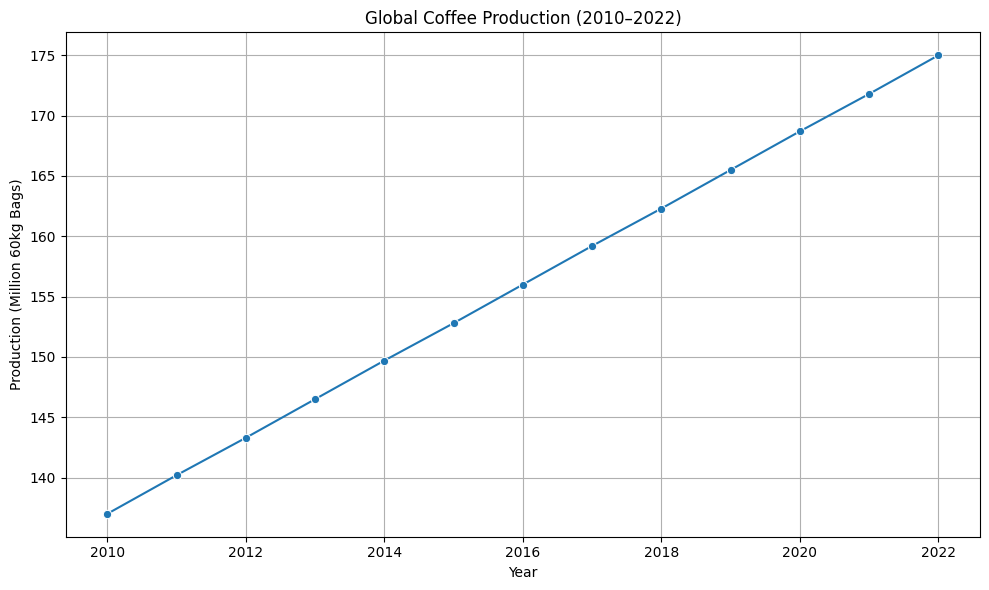

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Global_Production_Million_Bags', marker='o')
plt.title("Global Coffee Production (2010–2022)")
plt.xlabel("Year")
plt.ylabel("Production (Million 60kg Bags)")
plt.grid(True)
plt.tight_layout()
plt.show()


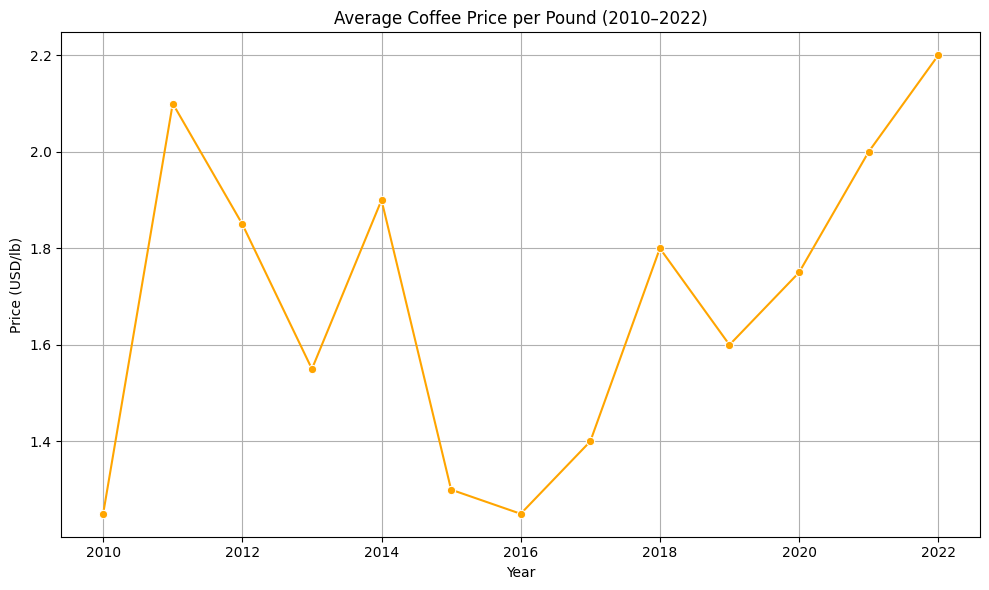

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Avg_Price_USD_per_lb', marker='o', color='orange')
plt.title("Average Coffee Price per Pound (2010–2022)")
plt.xlabel("Year")
plt.ylabel("Price (USD/lb)")
plt.grid(True)
plt.tight_layout()
plt.show()


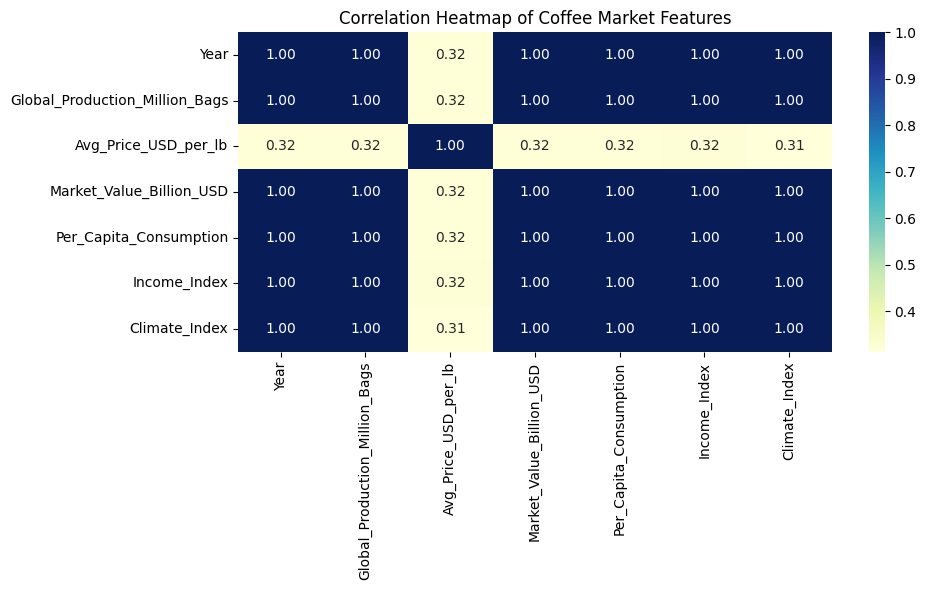

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Coffee Market Features")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target
features = ['Global_Production_Million_Bags', 'Avg_Price_USD_per_lb',
            'Per_Capita_Consumption', 'Income_Index', 'Climate_Index']
target = 'Market_Value_Billion_USD'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

# Show coefficients
coeff_df = pd.DataFrame(model.coef_, index=features, columns=["Coefficient"])
coeff_df


R² Score: 0.9999911776151043
RMSE: 0.029614251206767268


,Coefficient
Global_Production_Million_Bags,0.531116
Avg_Price_USD_per_lb,0.004425
Per_Capita_Consumption,9.666292
Income_Index,6.813067
Climate_Index,-2.608161


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Forecasted Market Value (Billion USD):
2023    111.978566
2024    113.948332
2025    115.909337
2026    117.861619
2027    119.805219
2028    121.740173
2029    123.666521
2030    125.584300
Name: predicted_mean, dtype: float64


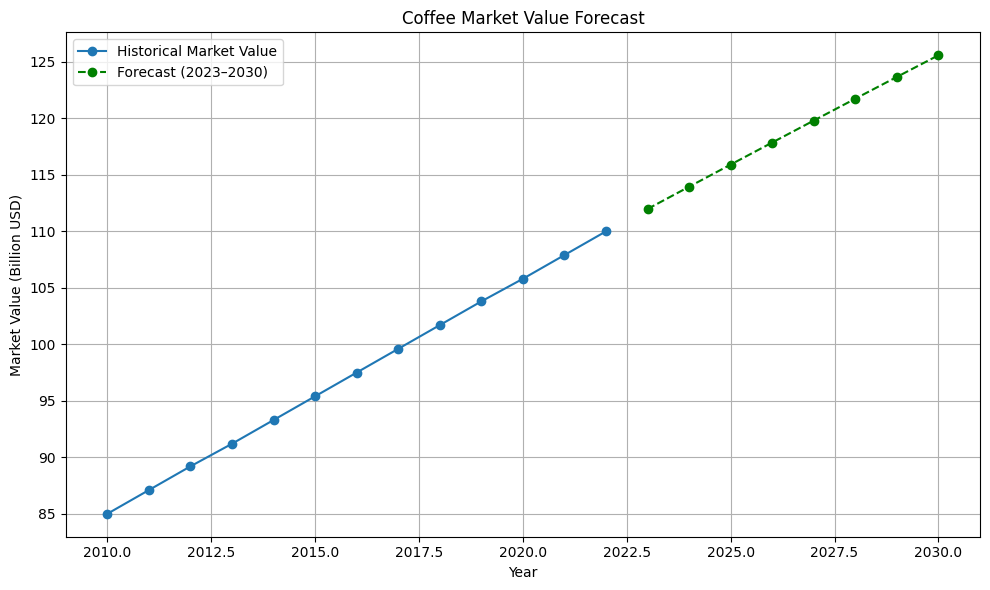

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare data
df_ts = df.copy()
df_ts.set_index('Year', inplace=True)

# Fit ARIMA model (simple example, order can be tuned later)
model = ARIMA(df_ts['Market_Value_Billion_USD'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 8 years (2023–2030)
forecast = model_fit.forecast(steps=8)
forecast.index = range(2023, 2031)

# Display forecast
print("Forecasted Market Value (Billion USD):")
print(forecast)

# Plot actual vs. forecast
plt.figure(figsize=(10, 6))
df_ts['Market_Value_Billion_USD'].plot(label='Historical Market Value', marker='o')
forecast.plot(label='Forecast (2023–2030)', marker='o', linestyle='--', color='green')
plt.title('Coffee Market Value Forecast')
plt.xlabel('Year')
plt.ylabel('Market Value (Billion USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Business insight-based strategic recommendations
recommendations = {
    "Market Concentration Risk": "Diversify sourcing to reduce dependency on Brazil and top 3 producers.",
    "Climate Impact": "Invest in climate-resilient coffee farming and agroforestry solutions.",
    "Income Correlation": "Target emerging markets with rising middle class for coffee expansion.",
    "Premium Segment": "Focus on developing and branding high-margin premium & specialty products."
}

# Convert to DataFrame for display
pd.DataFrame.from_dict(recommendations, orient='index', columns=["Strategic Recommendation"])


,Strategic Recommendation
Market Concentration Risk,Diversify sourcing to reduce dependency on Bra...
Climate Impact,Invest in climate-resilient coffee farming and...
Income Correlation,Target emerging markets with rising middle cla...
Premium Segment,Focus on developing and branding high-margin p...
